# **London Housing Prices - Exploratory Data Analysis**

Data provided by [London Datastore](https://data.london.gov.uk/). 
[License](http://www.nationalarchives.gov.uk/doc/open-government-licence/version/3/) terms apply.

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [347]:
# load data
data_url = 'https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK_House_price_index.xlsx'

df_by_type = pd.read_excel(data_url, sheet_name = 'By type', header = 3)
df_average_price = pd.read_excel(data_url, sheet_name = 'Average price',
                                 usecols = "A:AH, AJ, AK, AM:AU, AW")
df_sales_volume = pd.read_excel(data_url, sheet_name = 'Sales Volume')

## Average Property Price

Clean dataframe

In [348]:
# drop empty row
df_average_price = df_average_price.drop(df_average_price.index[0])
# format date column and make it index
df_average_price.rename(columns = {'Unnamed: 0':'Date'}, inplace = True)
df_average_price.Date = pd.to_datetime(df_average_price.Date)
df_average_price = df_average_price.set_index('Date')
# check for missing values
df_average_price. isnull().values.any()
# express in thousands
df_average_price = df_average_price.div(1000)
# standardise string formatting
for key in df_average_price:
  if key.isupper():
    print(key)
    newkey = key[0] + key[1:].lower()
    if ' ' in key:
      for s in range(0,len(newkey)):
        if newkey[s].isspace():
          newkey = newkey[0:s+1] + newkey[s+1].upper() + newkey[s+2:]
          print(newkey)
    df_average_price = df_average_price.rename(columns={key: newkey})

df_average_price.head()

NORTH EAST
North East
NORTH WEST
North West
YORKS & THE HUMBER
Yorks & the humber
Yorks & The humber
Yorks & The Humber
EAST MIDLANDS
East Midlands
WEST MIDLANDS
West Midlands
EAST OF ENGLAND
East Of england
East Of England
LONDON
SOUTH EAST
South East
SOUTH WEST
South West


,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,Enfield,Greenwich,Hackney,Hammersmith & Fulham,Haringey,Harrow,Havering,Hillingdon,Hounslow,Islington,Kensington & Chelsea,Kingston upon Thames,Lambeth,Lewisham,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster,Inner London,Outer London,North East,North West,Yorks & The Humber,East Midlands,West Midlands,East Of England,London,South East,South West,England
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1995-01-01,91.449,50.4602,93.2845,64.9581,71.3066,81.6715,120.933,69.1582,79.8859,72.5147,62.3001,61.2965,124.903,76.2876,84.7695,68.0001,73.8348,72.2317,92.5165,182.695,80.8758,67.771,60.4913,82.0706,53.5393,72.1896,109.326,67.8852,71.537,59.8652,61.3194,88.559,133.025,78.252,72.9588,42.0764,43.9585,44.8034,45.5445,48.5275,56.7016,74.4358,64.0189,54.7052,53.2028
1995-02-01,82.2028,51.0858,93.1902,64.7879,72.0223,81.6576,119.509,68.9511,80.8971,73.1552,60.9933,63.1871,122.088,78.9012,83.3961,69.3935,75.0311,71.0516,94.3424,182.345,81.2301,65.3815,60.8693,79.9827,53.1539,72.1416,111.103,64.7991,70.8932,62.3185,60.2521,88.641,131.468,75.8857,72.9379,42.572,43.9254,44.5288,46.0516,49.3413,56.5936,72.7779,63.715,54.3561,53.0962
1995-03-01,79.1207,51.269,92.2475,64.3675,72.0158,81.4493,120.282,68.7124,81.3799,72.1904,61.3778,63.5933,120.636,78.5219,83.4162,69.368,74.1887,72.098,93.4659,182.879,81.1115,66.3365,60.288,80.6617,53.4583,72.5014,107.325,65.7633,70.3068,63.9387,60.8711,87.1248,132.26,76.5916,72.7145,42.3697,44.4349,45.2005,45.3838,49.4422,56.1712,73.8968,64.1136,53.5831,53.2013
1995-04-01,77.1012,53.1335,90.7629,64.2777,72.9656,81.1244,120.098,68.61,82.1889,71.4429,61.9277,65.1396,121.425,79.5456,83.5679,69.4443,73.9114,71.8903,93.3445,184.177,81.6728,66.3888,59.471,79.9905,54.4798,72.2286,106.875,63.0736,69.4119,66.2332,60.9714,87.026,133.37,76.8516,72.5919,42.0958,44.2678,45.6143,46.1242,49.4559,56.5679,74.4553,64.6232,54.786,53.5909
1995-05-01,84.4091,53.0422,90.258,63.9971,73.704,81.5426,119.929,68.8449,82.0771,70.6308,63.513,66.194,124.434,79.374,83.8537,68.5345,73.1171,72.8775,94.3464,191.474,82.1235,69.0351,58.5514,80.874,55.804,72.3666,107.708,64.4205,69.7592,66.4329,61.4942,86.5181,133.911,79.1292,72.753,43.2665,44.2236,44.831,45.878,50.3697,56.4798,75.432,64.5304,54.6988,53.6782


Latest average prices per area

In [349]:
# split into meaningful categories
ldn_summary = ['Inner London','Outer London']
engl_regions =['North East','North West', 'Yorks & The Humber','East Midlands',
               'West Midlands','East Of England','London','South East','South West']
#london boroughs
df_ldn = df_average_price
df_ldn = df_ldn.drop(columns=ldn_summary)
df_ldn = df_ldn.drop(columns=engl_regions)
df_ldn = df_ldn.drop(columns='England')

#london summary
df_ldn_summary = df_average_price[ldn_summary]

#england
df_engl = df_average_price[engl_regions]

Text(0.5, 1.0, 'England - Average House Prices: October2020')

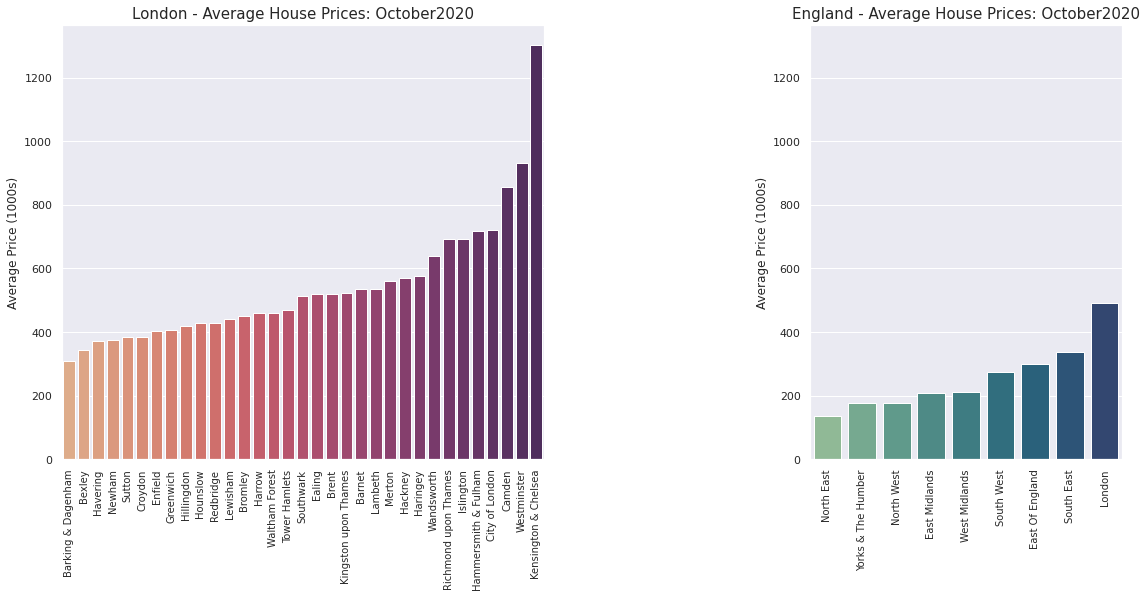

In [350]:
# plot
sns.set(rc={'figure.figsize':(19,8)})
plt.subplot(1, 2, 1)
to_plot = df_ldn.drop(df_average_price.index[0:rows-1])
to_plot = to_plot.sort_values(by = to_plot.index[0], axis = 1) 
b = sns.barplot(data=to_plot,palette='flare')
yl = b.get_ylim();
b.set_xticklabels(b.get_xticklabels(),
                  fontdict={'fontsize': 10}, rotation=90)

b.set_ylabel('Average Price (1000s)')
b.set_title('London - Average House Prices: '+ df_average_price.index[-1].month_name() +
            str(df_average_price.index[-1].year),  fontdict={'fontsize': 15})
plt.subplot(1, 3, 3)
to_plot = df_engl.drop(df_average_price.index[0:rows-1])
to_plot = to_plot.sort_values(by = to_plot.index[0], axis = 1) 
b = sns.barplot(data=to_plot, palette='crest')
b.set_ylim(yl)
b.set_xticklabels(b.get_xticklabels(),
                  fontdict={'fontsize': 10}, rotation=90)
b.set_ylabel('Average Price (1000s)')
b.set_title('England - Average House Prices: '+ df_average_price.index[-1].month_name() +
            str(df_average_price.index[-1].year),  fontdict={'fontsize': 15})

In [351]:
# some descriptives:
print('Average House Prices: '+ df_average_price.index[-1].month_name() +
            str(df_average_price.index[-1].year))
engl_desc = df_engl.drop(df_engl.index[0:rows-1])
engl_desc = engl_desc.sort_values(by = engl_desc.index[0], axis = 1) 
print('Least expensive English region: ' + engl_desc.columns[0] + ' at GBP ' + 
      str(np.round(engl_desc.iloc[0,0])))
print('Most expensive English region: ' + engl_desc.columns[-1] + ' at GBP ' + 
      str(np.round(engl_desc.iloc[0,-1])))

ldn_desc = df_ldn.drop(df_ldn.index[0:rows-1])
ldn_desc = ldn_desc.sort_values(by = ldn_desc.index[0], axis = 1) 
print('Least expensive London Borough: ' + ldn_desc.columns[0] + ' at GBP ' + 
      str(np.round(ldn_desc.iloc[0,0])))
print('Most expensive London Borough: ' + ldn_desc.columns[-1] + ' at GBP ' + 
      str(np.round(ldn_desc.iloc[0,-1])))


Average House Prices: October2020
Least expensive English region: North East at GBP 136.0
Most expensive English region: London at GBP 491.0
Least expensive London Borough: Barking & Dagenham at GBP 309.0
Most expensive London Borough: Kensington & Chelsea at GBP 1301.0


Price development over time per region

Text(0, 0.5, 'Average Price (1000s)')

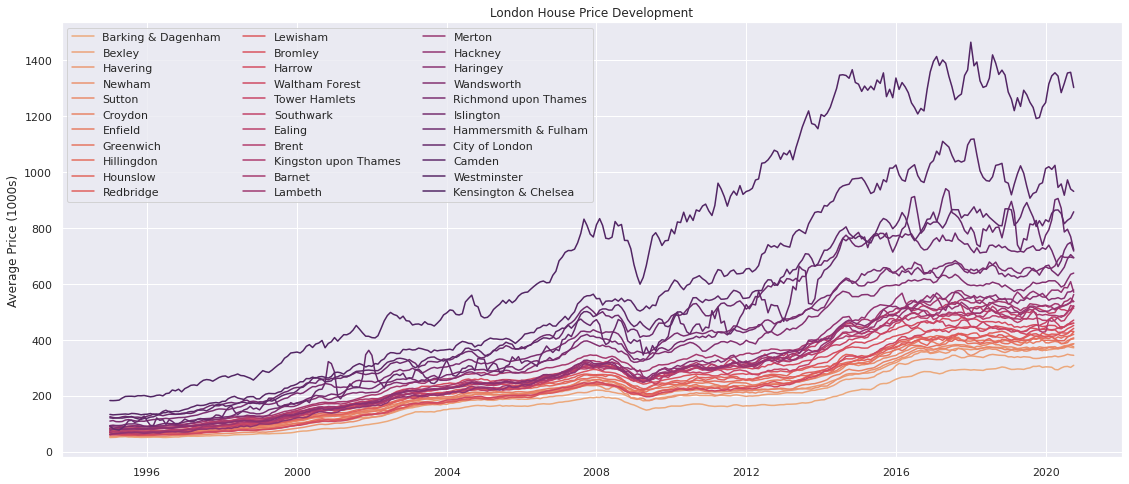

In [352]:
#London
colours = sns.set_palette('flare', n_colors = len(list(df_ldn)))
df_ldn = df_ldn.sort_values(by = df_ldn.index[-1], axis = 1) 
for region in df_ldn:
  plt.plot(df_ldn[region])
plt.legend(list(df_ldn),loc=2,ncol=3)
plt.title('London House Price Development')
plt.ylabel('Average Price (1000s)')

Text(0, 0.5, 'Average Price (1000s)')

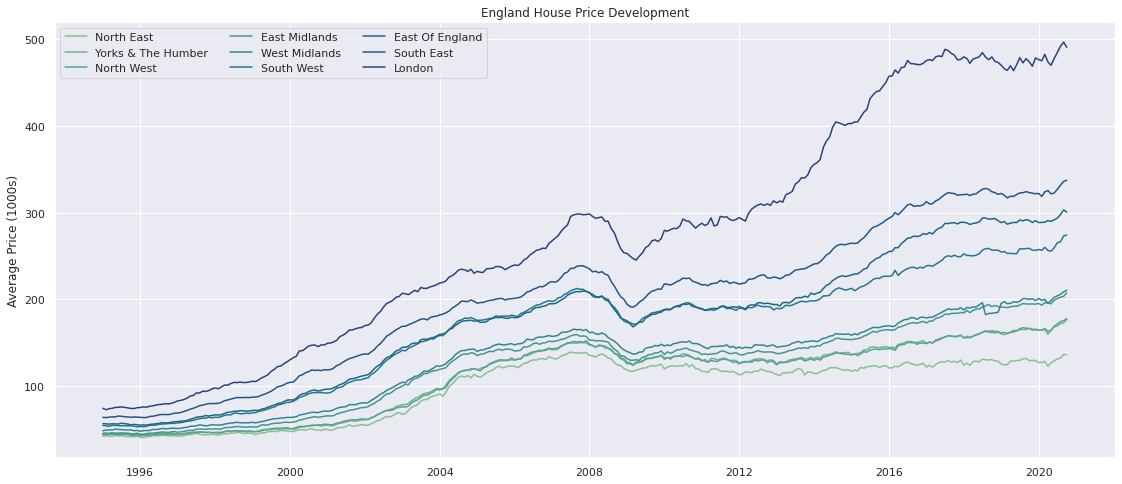

In [353]:
#England
colours = sns.set_palette('crest', n_colors = len(list(df_engl)))
df_engl = df_engl.sort_values(by = df_engl.index[-1], axis = 1) 
for region in df_engl:
  plt.plot(df_engl[region])
plt.legend(list(df_engl),loc=2,ncol=3)
plt.title('England House Price Development')
plt.ylabel('Average Price (1000s)')

## Prices per property type


In [451]:
# Clean dataframe
df_by_type = pd.read_excel(data_url, sheet_name = 'By type', header = 3)
df_by_type = df_by_type.drop( ['Detached.1','Semi Detached.1','Terraced.1','Flat.1','Detached.3','Semi Detached.3','Terraced.3','Flat.3'],axis=1)
df_by_type = df_by_type.rename(columns = {'Detached':'Detached LDN',
                                          'Detached.2':'Detached UK',
                                          'Semi Detached':'Semi Detached LDN',
                                          'Semi Detached.2':'Semi Detached UK',
                                          'Terraced' :'Terraced LDN',
                                          'Terraced.2' :'Terraced UK',
                                          'Flat':'Flat LDN',
                                          'Flat.2':'Flat UK'})
# create date series
for row in range(0,len(df_by_type)):
  if np.isnan(df_by_type['Unnamed: 0'][row]):
    df_by_type['Unnamed: 0'][row] = df_by_type['Unnamed: 0'][row-1]
  join = df_by_type['Unnamed: 1'][row] 
  join = join +  '-' + str(int(df_by_type['Unnamed: 0'][row]))
  df_by_type['Unnamed: 1'][row] = join

df_by_type['Unnamed: 1'] = pd.to_datetime(df_by_type['Unnamed: 1'])
df_by_type.rename(columns = {'Unnamed: 1':'Date'}, inplace = True)
df_by_type = df_by_type.drop(['Unnamed: 0'], axis = 1)
df_by_type = df_by_type.set_index('Date')
# replace empty cells with nan
df_by_type = df_by_type.replace('-', np.nan, regex=True)
#express in k
df_by_type = df_by_type.div(1000, fill_value=None)
df_by_type.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,Detached LDN,Semi Detached LDN,Terraced LDN,Flat LDN,Detached UK,Semi Detached UK,Terraced UK,Flat UK
Date,,,,,,,,
1995-01-01,161.449305,95.897529,73.705966,64.618572,NaN,NaN,NaN,NaN
1995-02-01,157.449439,96.084273,73.756540,60.358672,NaN,NaN,NaN,NaN
1995-03-01,156.089829,94.980819,73.571216,64.185604,NaN,NaN,NaN,NaN
1995-04-01,156.932137,95.192551,73.989769,65.098795,NaN,NaN,NaN,NaN
1995-05-01,158.778427,96.726668,75.063482,65.717662,NaN,NaN,NaN,NaN


Latest Prices per Property Type

Text(0.5, 1.0, 'England - Average House Prices: October2020')

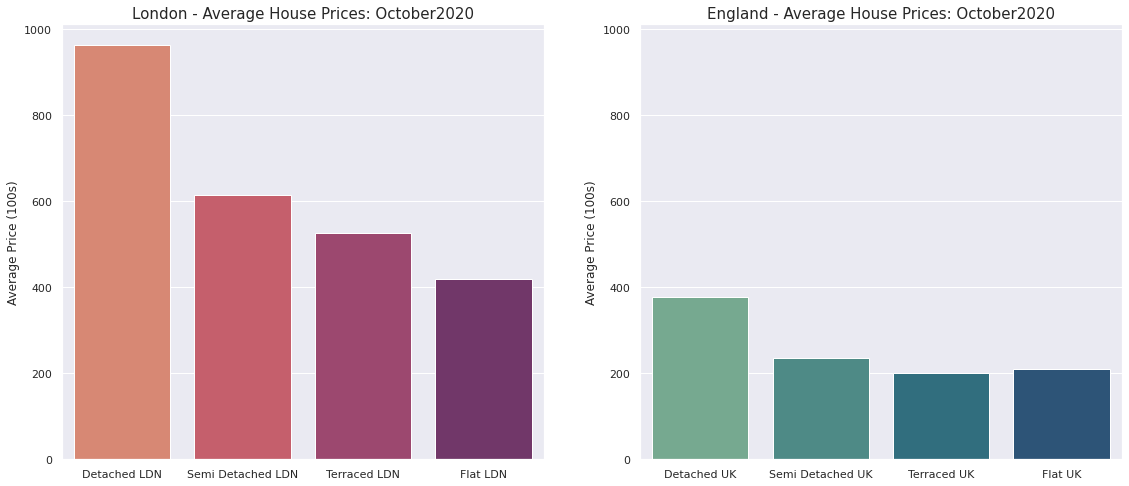

In [466]:
plt.subplot(1, 2, 1)
to_plot = df_by_type[['Detached LDN','Semi Detached LDN','Terraced LDN','Flat LDN']]
to_plot = to_plot.drop(to_plot.index[0:rows-1])
b = sns.barplot(data=to_plot,palette='flare')
yl = b.get_ylim()
b.set_ylabel('Average Price (1000s)')
b.set_title('London - Average House Prices: '+ df_by_type.index[-1].month_name() +
            str(df_by_type.index[-1].year),  fontdict={'fontsize': 15})


plt.subplot(1, 2, 2)
to_plot = df_by_type[['Detached UK','Semi Detached UK','Terraced UK','Flat UK']]
to_plot = to_plot.drop(to_plot.index[0:rows-1])
b = sns.barplot(data=to_plot,palette='crest')
b.set_ylim(yl)
b.set_ylabel('Average Price (1000s)')
b.set_title('England - Average House Prices: '+ df_by_type.index[-1].month_name() +
            str(df_by_type.index[-1].year),  fontdict={'fontsize': 15})